In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version:  0.0.18


In [3]:
from lmfit import *

See: https://lmfit.github.io/lmfit-py/builtin_models.html  for more examples

## This "Another Data Set" from 2022-03-24 fitting custom functions


In [4]:
x_data,y_data=(array([0.        , 0.12820513, 0.25641026, 0.38461538, 0.51282051,
        0.64102564, 0.76923077, 0.8974359 , 1.02564103, 1.15384615,
        1.28205128, 1.41025641, 1.53846154, 1.66666667, 1.79487179,
        1.92307692, 2.05128205, 2.17948718, 2.30769231, 2.43589744,
        2.56410256, 2.69230769, 2.82051282, 2.94871795, 3.07692308,
        3.20512821, 3.33333333, 3.46153846, 3.58974359, 3.71794872,
        3.84615385, 3.97435897, 4.1025641 , 4.23076923, 4.35897436,
        4.48717949, 4.61538462, 4.74358974, 4.87179487, 5.        ]),
 array([ 1.0428932 ,  0.89749902,  0.75670392,  0.64111299,  0.55718173,
         0.52405064,  0.56088843,  0.5490807 ,  0.42480484,  0.47428914,
         0.2934649 ,  0.34352106,  0.33185889,  0.27993667,  0.26003406,
         0.27138304,  0.39834035,  0.28156451,  0.2572975 ,  0.27710445,
         0.15969731,  0.22588548,  0.18106594,  0.15347512,  0.25385423,
         0.20835157,  0.1964213 ,  0.09014651,  0.11874164,  0.14871592,
         0.06117995,  0.19194054,  0.05546755,  0.10819372,  0.13157402,
         0.16435838,  0.04113969, -0.03053311,  0.0710629 ,  0.08495973]))

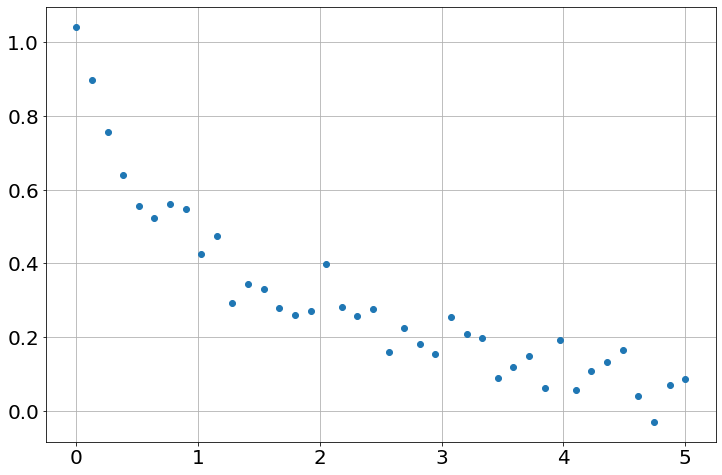

In [5]:
plot(x_data,y_data,'o')

## Step 1 - define the function

In [6]:
def exponential(x,A=1,B=1):
    return A*exp(-x/B)

## Step 2 - define the model and construct the parameter list

In [7]:
mymodel=Model(exponential)   # from lmfit

In [8]:
mymodel.param_names

['A', 'B']

In [9]:
params=mymodel.make_params()
params

name,value,initial value,min,max,vary
A,1.00000000,None,-inf,inf,True
B,1.00000000,None,-inf,inf,True


## Step 3 - modify the parameter list (min, max, etc...) as needed

In [11]:
params['A']=Parameter("A",min=0,value=1)
params['B']=Parameter("B",min=0,value=1)
params

name,value,initial value,min,max,vary
A,1.00000000,1,0.00000000,inf,True
B,1.00000000,1,0.00000000,inf,True


## Step 4 - do the fit, look at the parameter values (do they make sense?), etc...

In [12]:
result = mymodel.fit(y_data, params, x=x_data)
result

## Step 5 - plot your data and the predictions of the model

In [14]:
linspace(0,5,20)

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

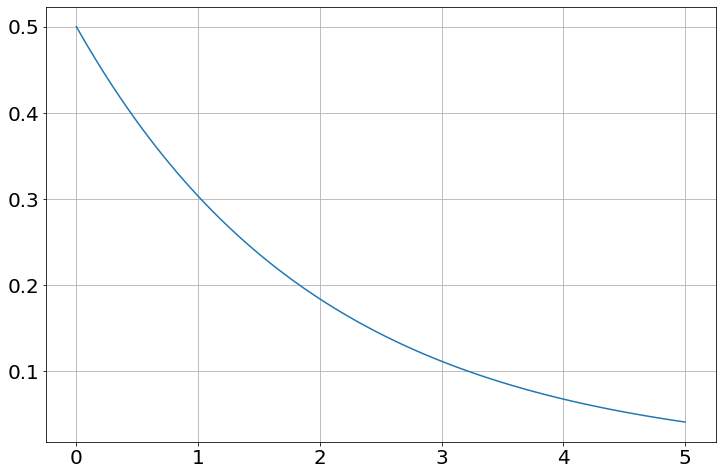

In [19]:
x_fake=linspace(0,5,100)
y_fake=.5*exp(-x_fake/2)
plot(x_fake,y_fake,'-')

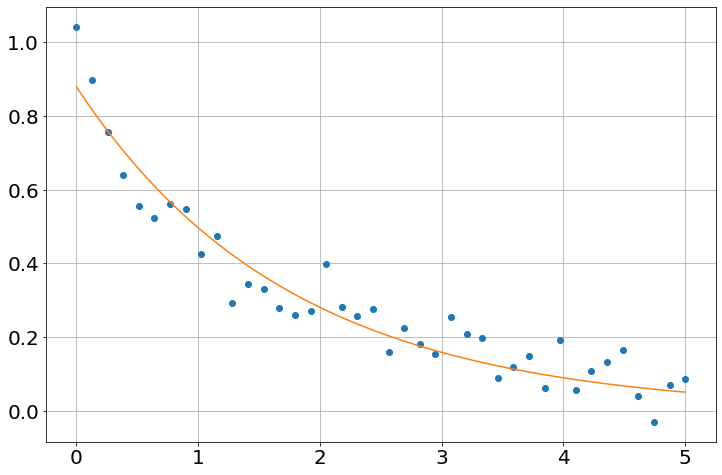

In [13]:
plot(x_data,y_data,'o')

x_fake=linspace(0,5,100)
y_fake=result.eval(x=x_fake)
plot(x_fake,y_fake,'-')

## play with the functional form

Text(1, 2.5, 'A=3, B=0.1, C=1, D=10')

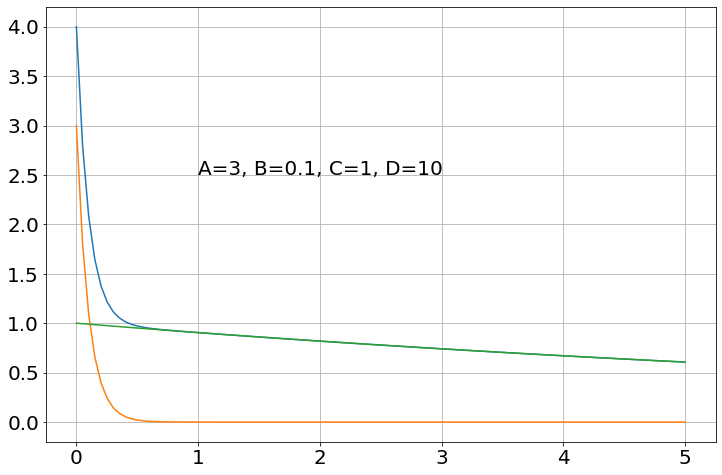

In [22]:
x=linspace(0,5,100)
A=3
B=0.1
C=1
D=10
y=A*exp(-x/B)+C*exp(-x/D)
plot(x,y)

y=A*exp(-x/B)
plot(x,y)

y=C*exp(-x/D)
plot(x,y)

text(1,2.5,f"A={A}, B={B}, C={C}, D={D}")

Text(1, 2.5, 'A=3, B=1, C=1, D=5')

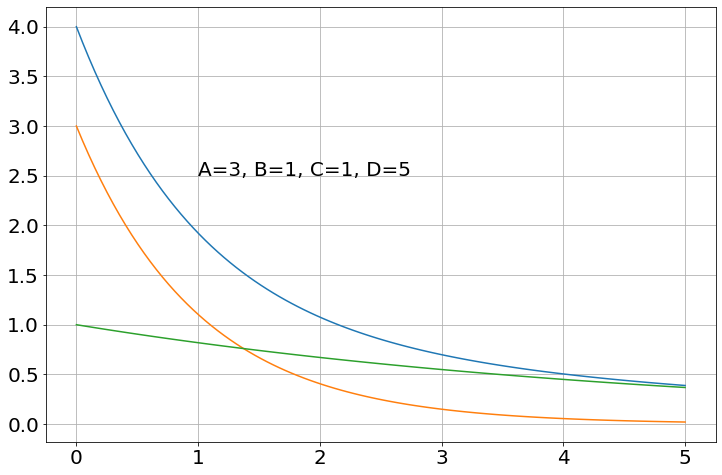

In [23]:
x=linspace(0,5,100)
A=3
B=1
C=1
D=5
y=A*exp(-x/B)+C*exp(-x/D)
plot(x,y)

y=A*exp(-x/B)
plot(x,y)

y=C*exp(-x/D)
plot(x,y)

text(1,2.5,f"A={A}, B={B}, C={C}, D={D}")

In [28]:
def double_exponential(x,A=1,B=1,C=1,D=1):
    return A*exp(-x/B)+C*exp(-x/D)

In [29]:
mymodel=Model(double_exponential)   # from lmfit

In [30]:
params=mymodel.make_params()
params['A']=Parameter("A",min=0,value=1)
params['B']=Parameter("B",min=0,value=1)
params['C']=Parameter("C",min=0,value=1)
params['D']=Parameter("D",min=0,value=1)
params

name,value,initial value,min,max,vary
A,1.00000000,1,0.00000000,inf,True
B,1.00000000,1,0.00000000,inf,True
C,1.00000000,1,0.00000000,inf,True
D,1.00000000,1,0.00000000,inf,True


In [31]:
result = mymodel.fit(y_data, params, x=x_data)
result

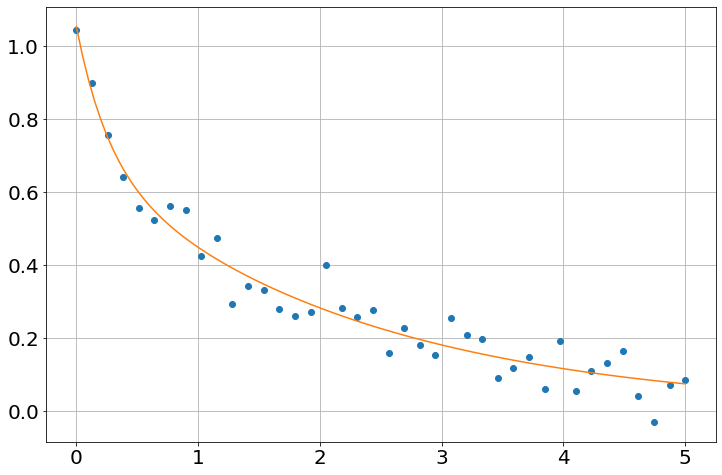

In [32]:
plot(x_data,y_data,'o')

x_fake=linspace(0,5,100)
y_fake=result.eval(x=x_fake)
plot(x_fake,y_fake,'-')